## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv') #Reading the dataset
df.head() #Looking the top few rows

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print("No. of rows is {}".format(df.shape[0]))#First index of the shape results in no. of rows

No. of rows is 294478


c. The number of unique users in the dataset.

In [4]:
print("The number of unique users in the dataset is {}".format(df.user_id.nunique())) 

The number of unique users in the dataset is 290584


d. The proportion of users converted.

In [5]:
print("The proportion of users converted is {}".format(df.converted.mean()))

The proportion of users converted is 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#we do individual queries for the two mismatched cases and then sum them
mismatchdf1 =  df.query('group == "treatment" and landing_page == "old_page"') #Mismatch 1
mismatchdf2 =  df.query('group == "control" and landing_page == "new_page"') # Mismatch 2
total_no_of_mismatches = mismatchdf1.user_id.count() + mismatchdf2.user_id.count() # Sum of the individual mismatch counts
print("The number of times the new_page and treatment don't match is {}".format(total_no_of_mismatches))

The number of times the new_page and treatment don't match is 3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

* Therefore, there are no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#We drop the mismatched queries directly so we end up only with the matched ones
df2=df.drop(df.query("(group == 'treatment' and landing_page == 'old_page') or (group == 'control' and landing_page == 'new_page')").index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print("No. of unique user_ids in df2 is {}".format(df2.user_id.nunique()))

No. of unique user_ids in df2 is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated('user_id')].user_id

2893    773192
Name: user_id, dtype: int64

* User_ID 773192 is repeated in df2

c. What is the row information for the repeat **user_id**? 

In [12]:
print("The row information for the repeat user_id :")
df2.query('user_id == 773192')

The row information for the repeat user_id :


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates('user_id',inplace = True)#Dropping the duplicates

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

### NOTE :
* Average of converted column gives the probabilty as converted and non-converted are represented as 1 and 0. 

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print("The probability of an individual converting regardless of the page they receive is {}".format(df2.converted.mean()))

The probability of an individual converting regardless of the page they receive is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
print("Given that an individual was in the control group,The probability they converted is {}".format(df2.query('group == "control"').converted.mean()))

Given that an individual was in the control group,The probability they converted is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
print("Given that an individual was in the treatment group,The probability they converted is {}".format(df2.query('group == "treatment"').converted.mean()))

Given that an individual was in the treatment group,The probability they converted is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
print("The probability that an individual received the new page is {}".format(df2.landing_page.value_counts()['new_page']/df2.landing_page.count()))

The probability that an individual received the new page is 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

### Answer :  
**No,** there is not suffecient evidence to conclude that the new treatment page leads to more conversions because the probability of conversion has relatively decreased in the new page in comparision with the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis :**  **$p_{old}$** >= **$p_{new}$**

**Alternate Hypothesis :** **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2.query('group == "treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2.query('group == "control"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.binomial(n_new,p_new) #Simulating a binomial simulation for new_page

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.binomial(n_old,p_old) #Simulating a binomial simulation for old_page

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old) #Calculating the difference
p_diff

-0.0011859741721974848

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new) #Simulating a binomial simulation for new_page
    old_page_converted = np.random.binomial(n_old,p_old) #Simulating a binomial simulation for old_page
    p_diff = (new_page_converted/n_new) - (old_page_converted/n_old) #Calculating the difference
    p_diffs.append(p_diff)
p_diffs = np.array(p_diffs) #converting list into nuumpy array

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

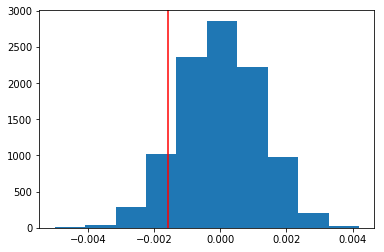

In [26]:
plt.hist(p_diffs); #Plotting the histogram for differnce in conversion rate
actual_difference = (df2.query('landing_page == "new_page"').converted.mean()) - (df2.query('landing_page == "old_page"').converted.mean()) 
plt.axvline(actual_difference, color = 'red'); #Plotting the calculated actual difference in the histogram

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
pval = (p_diffs > actual_difference).mean() #Calculating pvalue
print("Proportion of the p_diffs are greater than the actual difference observed in 'ab_data.csv' is",pval)

Proportion of the p_diffs are greater than the actual difference observed in 'ab_data.csv' is 0.9028


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### Answer :
* **p value** is been computed above as 0.9071
* At maximum Type I Error of 5%, The p value is greater than 0.05.
* This implies, we need fail to reject the Null Hypothesis.
* That is, the new page does not have a statistically significant better conversion rate than the older page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').user_id.count()
n_new = df2.query('group == "control"').user_id.count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
zscore, pvalue = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value = None, alternative='smaller', prop_var = False)

In [30]:
print("Pvalue is :", pvalue)
print("Zscore is :", zscore)

Pvalue is : 0.900834434411
Zscore is : 1.28632078586


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Answer :
* Pvalue almost matches with the previous computation and again proves there is no statistically significant increase in the conversion of new pages in comparision to the old pages.
- Ideal Z-Score at alpha(Type I error rate) = 00.05 is approximately 1.64.
- Our Z-Score is 1.28 which is lesser than 1.64 and hence it again implies that we fail to reject the Null Hypothesis.
- Confirming the earlier proved fact that there is no statistically significant increase in the conversion of new pages in comparision to the old pages.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = 1
df2[['treatment','control']] = pd.get_dummies(df2['group'])
df2.drop('control',axis=1,inplace=True)
df2.rename(columns={'treatment':'ab_page'},inplace = True)

In [32]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
import statsmodels.api as sm
import scipy.stats as stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) #To include chisquare probability
#Logistic Regression Model based on 'ab_page' for 'onverted'
mod1 = sm.Logit(df2['converted'],df2[['intercept','ab_page']]) 
res1 = mod1.fit() #fitting the model

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
res1.summary() #model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        08:51:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

### Answer :
* The pvalue associated with ab_page is 0.190.
* The pvalue is different from the earlier computed pvalue as this pvalue refers to the hypothesis involving the co-effecients of ab_page to check whether ab_page is significant or not.
* Since pvalue > 0.05(alpha value). Here it is statistically insignificant
* The Hypothesis test computed in Part II was one tailed to check if the new_page has a **higher** conversion rate
* The Hypothesis test computed here are two tailed to check if the new_page has a **different** conversion rate

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Answer :
Considering multiple explanatory factors may or may not be a good choice depends on the choice of explanatory variable on how well the model performs on the response variable. But generally having,multiple indepent explanatory variables correlated with the response variable improves the model to perform better. But there might be some disadvantes like :
* Multicollinearity
* Correlated Errors
* Non-Constant Variance
* Outliers

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

In [35]:
country_df = pd.read_csv('countries.csv')
#country_df.head()
df_new = country_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')#Inner join to avoid Nulls
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0


In [36]:
df_new[['US','UK',"CA"]]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0


In [37]:
#Logistic Regression Model based on the 'country' for 'convetred' 
mod2 = sm.Logit(df_new['converted'],df_new[['intercept','UK','CA']])  
res2 = mod2.fit() #Fitting the model
res2.summary() #Model Summary 

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        08:51:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

* From the above summary, Since the pvalues of 'UK' and 'CA' are not significant(pval>00.5). 
* Hence, We fail to reject the Null Hypothesis

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
#Logistic Regression Model based on the 'country' and 'ab_page' for 'convetred'
mod3 = sm.Logit(df_new['converted'], df_new[['intercept','UK','CA','ab_page']])
res3 = mod3.fit() #Fitting the model
res3.summary() #Model Summary 

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        08:51:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
==============================================================================
"""

* From the above summary, Since the pvalues of all the explanatory variables('UK','CA' and 'ab_page') are not significant(pval>00.5).
* Hence, We fail to reject the Null Hypothesis

<a id='conclusions'></a>
### Conclusion : 
* From the statistical summaries of all three models, their respective explanatory variable failed to significantly explain the response variable. Hence we fail to reject the NULL Hypothesis 
* That is, in no means we could observe that the new_page is significantly better in conversion rate than the older_page.
* Thus we can continue using the older page but these results might have some limitations and might also be due to a lesser runtime duration of the experiment. Running the a/B test for a longer run may overcome change aversion and yield a different results.
* Suggested Decision : Continue with the Older page.

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0